In [1]:
## importing packages and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [2]:
## loading in the file, videogame sales obtained from https://www.kaggle.com/datasets/thedevastator/global-video-game-sales/data

df = pd.read_csv(r"C:\Users\Donut\Downloads\vgsales.csv")

In [3]:
## quick look at the dataset, #data cleaning

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
## information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [27]:
## statistics of dataset
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
## checking if there are nulls, there are 271 nulls in 'Year' and 58 nulls in 'Publisher'

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
## dropping rows that contains nulls as missing years and publishers could affect the analysis further down

df.dropna(axis=0, inplace=True)

In [7]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
## checking for and dropping duplicates
df.duplicated().sum()

df.drop_duplicates()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
## updated rows and columns of dataset
df.shape

(16291, 11)

In [10]:
## converting year column to int64

df['Year'] = df['Year'].astype(np.int64)

In [11]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##  EDA

## 1.) Which Genre generated the most sales? most popular?

In [12]:
top_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
top_genre

Genre
Action          1722.84
Sports          1309.24
Shooter         1026.20
Role-Playing     923.83
Platform         829.13
Misc             789.87
Racing           726.76
Fighting         444.05
Simulation       389.98
Puzzle           242.21
Adventure        234.59
Strategy         173.27
Name: Global_Sales, dtype: float64

In [13]:
## 'Action' genre appears to have the most global sales out of all the genres. Following that are 'Sports' and 'Shooters', 
## all exceeding $1 billion. These top 3 genres are the most popular amongst consumers and video game enthusiasts. 

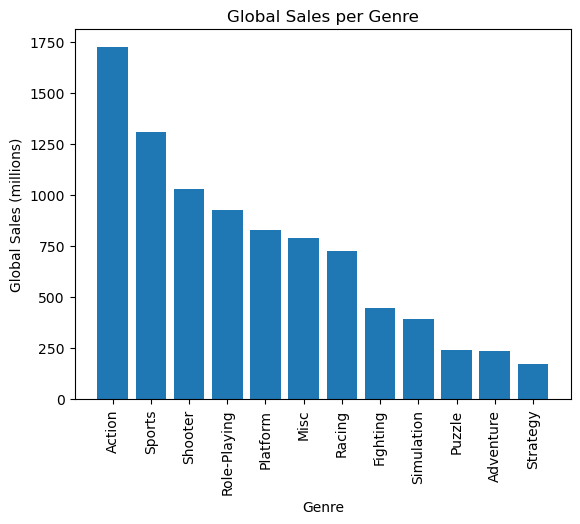

In [14]:
genres = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc', 'Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']


plt.bar (x = genres, height = top_genre)
plt.xticks(genres, rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.title('Global Sales per Genre')
plt.show()

## 2.) Which Platform created the most games and sales? least?

In [28]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [16]:
## 'DS' produced by Nintendo appears to have the most games, being 2,131. After the top platform, 'PS2' and 'PS3', 
## produced by Sony Computer Entertainment have 2,127 games and 1,304 games, respectively.

In [17]:
top_platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
top_platform_sales

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
GB       254.42
XB       252.09
NES      251.07
3DS      246.27
N64      218.21
SNES     200.05
GC       197.14
XOne     141.06
2600      86.57
WiiU      81.86
PSV       61.60
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

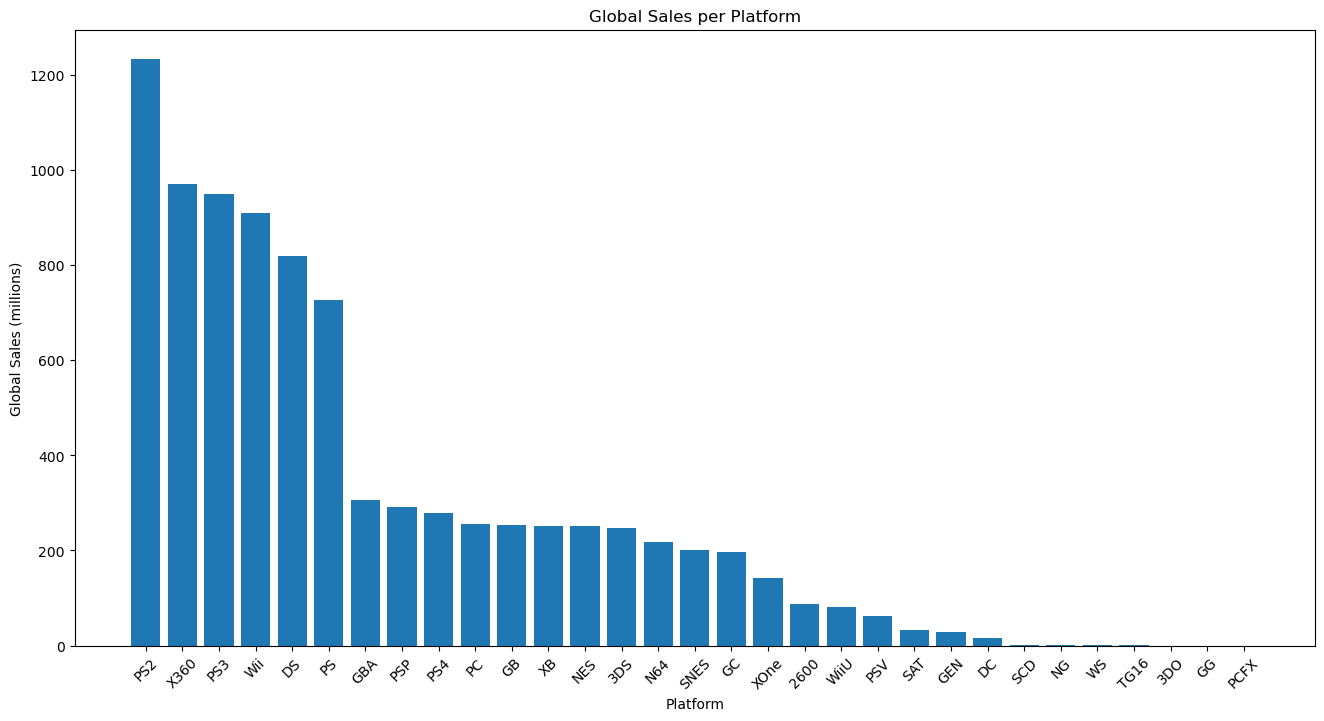

In [18]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA','PSP','PS4', 'PC', 'GB', 'XB', 'NES', '3DS', 'N64', 'SNES', 'GC', 
             'XOne', '2600', 'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG', 'PCFX']

plt.figure(figsize = (16,8))
plt.bar(x=platforms, height = top_platform_sales)
plt.ylabel('Global Sales (millions)')
plt.xlabel('Platform')
plt.xticks(platforms, rotation = 45)
plt.title('Global Sales per Platform')
plt.show()

In [19]:
## PS2 appears to have the most sales by platform. Many people seem to like the performance of the PS2 and demand is certainly
## there. It tops the second highest platform by $264 million in sales. It is also noteworthy that the top 6 platforms are 
## substantially higher than the subsequent platforms. Sales from the top 6 are double, triple, and even quadruple than those below.

## 3.) Which Publisher company created the most games? least?

In [20]:
top_publisher = df.groupby('Publisher')
top_publisher_games = top_publisher.size()
top_publisher_games.sort_values(ascending = False)


Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Ertain                             1
Epic Games                         1
Seventh Chord                      1
Enjoy Gaming ltd.                  1
MLB.com                            1
Length: 576, dtype: int64

In [21]:
## Electronic Arts, Activision, and Namco Bandai Games are the top three publishers for creating the most games. They've made
## nearly 1,000 titles each by themselves throughout the whole video game industry.

## 4.) Which games generated the most global sales?

In [22]:
top_sales = df[['Name', 'Publisher', 'Global_Sales']]
top_sales.sort_values(by='Global_Sales', ascending = False)

,Name,Publisher,Global_Sales
0,Wii Sports,Nintendo,82.74
1,Super Mario Bros.,Nintendo,40.24
2,Mario Kart Wii,Nintendo,35.82
3,Wii Sports Resort,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,Nintendo,31.37
...,...,...,...
16183,Sakura-Sou no Pet na Kanojo,Kadokawa Games,0.01
16184,Fatal Fury: Battle Archives Volume 2 (JP sales),SNK Playmore,0.01
16185,Tantei Jinguuji Saburo: Hai to Diamond,Arc System Works,0.01
16186,BattleForge,Electronic Arts,0.01


In [23]:
## Wii Sports appears to have the most global sales, $82.7 million, almost doubling of second place, Super Mario Bros. From the
## query, we can see the top 5 games are all from Nintendo. This could mean Nintendo games have appealed to the general public
## far better than any other publishers like Sony or Microsoft. A deeper analysis may be needed to find the reasons as to why this is.
## Are Nintendo products more affordable versus their competitors, are the games more suitable for all ages, and much more.

## 5.) How many games were developed every year?

In [31]:
yearly_games = df.groupby('Year')
yearly_games_total = yearly_games.size()
yearly_games_total.sort_values(ascending = False)

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
dtype: int64

In [32]:
## It appears that 2009 had the most games sold. Following that are years that are near the best year. It may seem that towards 
## the end of the 2010s, more and more games were being developed acrossed many platforms and sold. 

In [26]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 6.) What are each region's sales percentage compared to Global sales?

In [62]:
## creating 4 new columns to show each region's percentage in terms of sales per game comparing to the global sales

df['NA_Percentage'] = round((df['NA_Sales'] / df['Global_Sales'] * 100),2)
df['EU_Percentage'] = round((df['EU_Sales'] / df['Global_Sales'] * 100),2)
df['JP_Percentage'] = round((df['JP_Sales'] / df['Global_Sales'] * 100),2)
df['Other_Percentage'] = round((df['Other_Sales'] / df['Global_Sales'] * 100),2)

In [63]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Percentage,EU_Percentage,JP_Percentage,Other_Percentage
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.15,35.07,4.56,10.22
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.27,8.90,16.92,1.91
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.25,35.96,10.58,9.24
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.73,33.36,9.94,8.97
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.93,28.34,32.58,3.19


## 7.) What are the average regional sales percentage?

In [64]:
## creating 4 new columns to display the overall average of sales per region

df['NA_average'] = round((df['NA_Sales'] / df['Global_Sales'] * 100).mean(),2)
df['EU_average'] = round((df['EU_Sales'] / df['Global_Sales'] * 100).mean(),2)
df['JP_average'] = round((df['JP_Sales'] / df['Global_Sales'] * 100).mean(),2)
df['Other_average'] = round((df['Other_Sales'] / df['Global_Sales'] * 100).mean(),2)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_Percentage,EU_Percentage,JP_Percentage,Other_Percentage,NA_average,EU_average,JP_average,Other_average
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,50.15,35.07,4.56,10.22,45.39,22.9,24.42,6.48
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,72.27,8.90,16.92,1.91,45.39,22.9,24.42,6.48
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,44.25,35.96,10.58,9.24,45.39,22.9,24.42,6.48
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,47.73,33.36,9.94,8.97,45.39,22.9,24.42,6.48
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,35.93,28.34,32.58,3.19,45.39,22.9,24.42,6.48


In [ ]:
## NA accounts for roughly 45.39% of global sales, followed by Japan with 24.42%, EU with 22.9%, and lastly, other regions at 
## 6.48%.

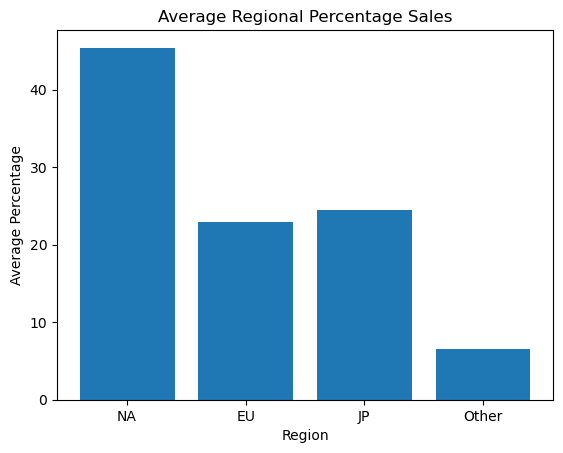

In [72]:
regions = ['NA', 'EU', 'JP', 'Other']
averages = [45.39, 22.9, 24.42, 6.48]

plt.bar(x = regions, height = averages)
plt.xlabel('Region')
plt.ylabel('Average Percentage')
plt.title('Average Regional Percentage Sales')
plt.show()

In [73]:
## exporting notebook to csv

df.to_csv(r'C:\Users\Donut\Documents\vgsales_editted.csv')